# Style Explorer

This interactive notebook for inspecting and generating style artwork.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

import torch
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### Style exploration

In [2]:
import style
st = style.IteratedStyleTransfer()

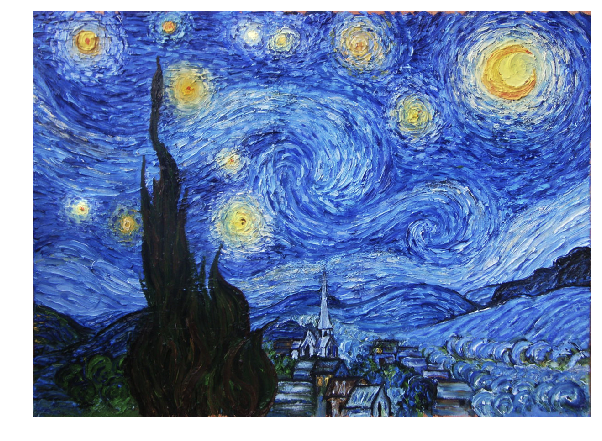

In [3]:
a = Image.open('van_gogh-starry-night.jpg')
plt.axis('off')
plt.imshow(a)
plt.show()

100%|███████████████████████| 600/600 [00:17<00:00, 33.95it/s, loss=[3.600e-03 2.407e-03 1.170e-03 2.232e-05], lr=0.01]


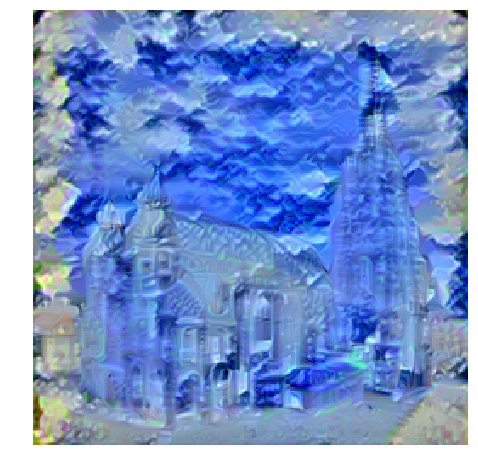

In [20]:
style_weights = np.zeros(len(st.conv_ids))
style_weights[[0,1,2,4]]= 1

np.random.seed(456)
torch.manual_seed(456)

#p = Image.fromarray(127 + (np.random.randn(256,256,3)*1e-2*255).astype(np.uint8))
p = Image.open('stephansdom.JPG')
sizes = style.ImagePyramid.get_sizes((256,256), 3)
x = style.run_multiscale(st, p, a, st.conv_ids[8], style_weights, sizes, niter=600)

plt.imshow(x[-1])
plt.axis('off')
plt.show()

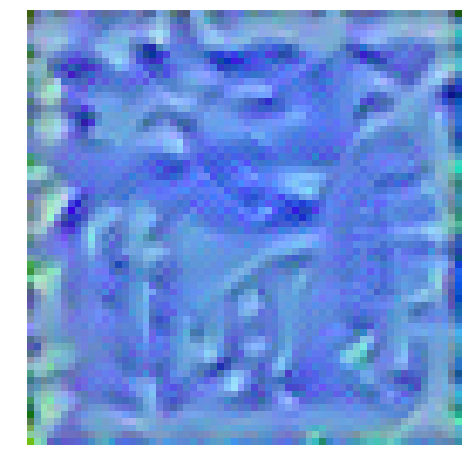

In [21]:
plt.imshow(x[0])
plt.axis('off')
plt.show()